## Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
from scipy import stats
import warnings
import seaborn

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
warnings.filterwarnings('ignore')

## Carga de Datos

In [5]:
# Cargamos el Dataset de A&V en una variable
url_data = '.\DatasetPobCR_Train - A&V.csv'
_ds = pd.read_csv(url_data, sep='\t', index_col = 0)

## Revisión general de los Datos

In [7]:
# Observamos algunos registros
_ds.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana


In [5]:
# Obtenemos los tipos de datos por columnas
data_types = _ds.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Id,object
v2a1,float64
hacdor,int64
rooms,int64
hacapo,int64
v14a,int64
refrig,int64
v18q,int64
v18q1,float64


In [6]:
# Obtenemos los estadísticos básicos para todas las variables, incluyendo las variables categóricas.
_ds.describe(include = 'all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557,9557,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557,9491,9557,9542,9557,9557,9557,9557,9557,9557,9557,9557,9557,9557
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,6,4,3,4,5,4,5,3,3,3,2,5,6,2
top,ID_c963939f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario3,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi1,Central,Urbana
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,2192,3762,6230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5677,6621,9271,9220,8459,7304,4679,8436,5449,5577,6175,4937,5911,5616,6829
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.677409,0.057549,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,NaN,1.406613,2.592445,0.284085,3.999058,NaN,NaN,NaN,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.102124,0.284608,0.975306,2.821492,34.303547,3.302292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.467492,0.232902,0.344713,0.328753,0.443145,0.175780,0.242582,0.179088,0.474631,0.462960,0.387548,0.485857,0.109506,0.097119,0.220349,0.099725,0.049001,0.114514,0.055942,0.111812,0.092791,NaN,1.366185,1.166074,0.597163,1.772216,NaN,NaN,NaN,4.167694,0.341384,

* Count: v2a1, v18q1, rez_esc, meaneduc, AbastecimientoElectricidad NO presentan la totalidad de registros, es decir que tienen algunos valores nulos (Nan), aunque para el caso de las dos últimas variables son apenas unos pocos, no así con las demás.
* Unique: De un total de 9557 entrevistas (registros) hay 2988 hogares diferentes, es decir que tenemos 9557/2988=3,19 entrevistados por hogar en promedio. Este valor es diferente de mean() para la variable de r4t3, lo cual significa que no se han entrevistado a la totalidad de integrantes de cada hogar.

## Análisis Estadístico de Variables

### Selección de variables de interés

Hicimos una calificación de las variables considerándolas como mayormente Causales o Consecuentes de pobreza, considerando que cuestiones relacionadas con los integrantes de las familias y sus cualidades como edad, dependencia, educación, edad, genero podrían ser consideradas causas; y cuestiones relacionadas con descripciones físicas de la casa y tenencia de bienes materiales consecuencias. No tenemos una opinión muy marcada sobre Causa/Consecuencia de la composición del hogar y la relación familiar que los une por lo que decidimos obviar esas variables de la elección.
A su vez por supuesto existe la clasificación de Hogar o Individual, que indica si las variables caracterizan a la persona entrevistada en ese registro o al hogar en general.

Dicho esto, elegiremos dos variables consideradas Causa y dos Consecuencia:
dependency (hogar), instlevel (individual), overcrowding (hogar), TipoVivienda (hogar); además de v2a1 (hogar) por considerarla de interés.

Para analizar el dataset resepecto de los hogares, necesitamos trabajar únicamente con los jefes de hogar, ya que todos los individuos de un hogar poseen los mismos datos respecto del hogar. Además si los considerásemos, la cantidad de integrantes de un hogar influirá en los parámetros generales

In [10]:
_ds_jef =_ds[_ds['parentesco1'] == 1]
_ds_jef.shape

(2973, 85)

Tenemos 2973 registros de jefes de hogar, sin embargo tenemos 2988 hogares diferentes, posiblemente no en todos los hogares se ha entrevistado al jefe de hogar. Por ser una diferencia mínima trabajaremos con este dataset de todos modos.

#### Variable 1: Dependency

Por ser una variable calificada como hogar, usaremos el dataset _ds_jef

##### 1. ¿Qué tipo de variable es?

In [8]:
_ds_jef['dependency'].value_counts().sort_index()

.16666667      1
.2            15
.22222222      1
.25           51
.2857143       1
.33333334    146
.40000001     12
.5           462
.60000002      1
.66666669     96
.71428573      1
.75           14
.80000001      2
.83333331      1
1.2            1
1.25           2
1.3333334     12
1.5          140
1.6666666      1
1.75           1
2            201
2.25           1
2.5           11
3             56
3.5            2
4             19
5              4
6              1
8            249
no           815
yes          653
Name: dependency, dtype: int64

Si bien el concepto al que representa es del tipo numérico (continua) se ve que los datos son categóricos por tener valores del tipo "yes", "no". No sabemos qué significan estos datos pero sabiendo que esta variable se calcula a partir de otras, podemos hacer el cálculo y comparar contra el valor real.

In [9]:
_ds_jef['dependencycalculated'] = _ds_jef[['hogar_nin','hogar_mayor']].sum(axis=1).div(_ds_jef['hogar_adul'])
_ds_jef.groupby(['dependency', 'dependencycalculated']).size()

dependency  dependencycalculated
.16666667   0.166667                  1
.2          0.166667                  2
            0.200000                 13
.22222222   0.222222                  1
.25         0.200000                  6
            0.222222                  1
            0.250000                 44
.2857143    0.285714                  1
.33333334   0.250000                 23
            0.285714                  1
            0.333333                122
.40000001   0.285714                  1
            0.333333                  1
            0.400000                 10
.5          0.333333                 67
            0.400000                  2
            0.500000                393
.60000002   0.600000                  1
.66666669   0.400000                  2
            0.500000                 19
            0.571429                  1
            0.666667                 74
.71428573   0.625000                  1
.75         0.600000                  3
       

Decidimos reemplazar dependency por dependencycalculated ya que, como en muchos casos los valores son iguales, podemos asumir que la fórmula es correcta

In [10]:
_ds_jef.drop(columns = 'dependency', inplace = True)

In [11]:
# Obtenemos los estadísticos principales para esta nueva variable.
_ds_jef['dependencycalculated'].describe()

count    2973.0
mean        inf
std         NaN
min         0.0
25%         0.0
50%         0.5
75%         1.0
max         inf
Name: dependencycalculated, dtype: float64

##### 2. ¿Existen outliers en las variables seleccionadas?

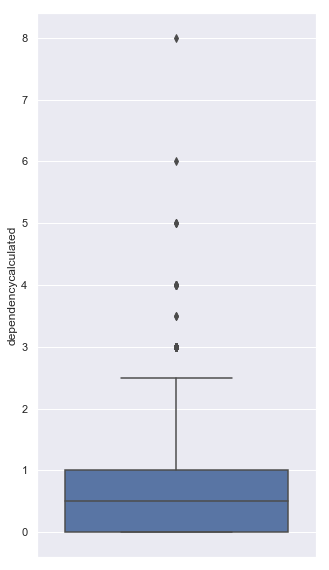

In [12]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='dependencycalculated')

Como puede observarse en el gráfico, los valores considerados típicos van de 0 a 2,5. El tercer cuartil, es decir como máximo el 75% de los valores, se encuentran hasta el valor 1. El primer cuartil, es decir como máximo el 25% de los valores, se encuentran en hasta el valor 0. Para el caso de la mediana se ve que ronda el 0,5. No hay valores atípicos negativos. Visualmente los outliers son relativamente pocos y el máximo llega a 8.

* Distancia a la media de 3 desviación standard:

In [13]:
print('Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos', sum(np.abs(ss.zscore(_ds_jef.dependencycalculated)>3)), 'outliers')

Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos 0 outliers


* 1.5 * IQR (rango intercuartil):

In [14]:
Q1 = _ds_jef.dependencycalculated.quantile(1/4)
Q3 = _ds_jef.dependencycalculated.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.dependencycalculated <= Q1 - 1.5*IQR) | (_ds_jef.dependencycalculated >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 67 outliers en Duración de interrupción


In [15]:
_ds_jef[is_outlier].sort_values(by=['dependencycalculated']).dependencycalculated.value_counts().sort_index()

2.5    11
3.0    38
3.5     2
4.0     8
5.0     3
6.0     1
8.0     1
inf     3
Name: dependencycalculated, dtype: int64

Una buena parte de los considerados outliers bajo este cálculo están al límite de los Qx, los 11 con valor 2,5, por lo que en este análisis preferimos excluir los extremos, es decir, replicamos el código anterior pero cambiando los <= y >=por < y >

In [16]:
Q1 = _ds_jef.dependencycalculated.quantile(1/4)
Q3 = _ds_jef.dependencycalculated.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.dependencycalculated < Q1 - 1.5*IQR) | (_ds_jef.dependencycalculated > Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 56 outliers en Duración de interrupción


In [17]:
_ds_jef[is_outlier].sort_values(by=['dependencycalculated']).dependencycalculated.value_counts().sort_index()

3.0    38
3.5     2
4.0     8
5.0     3
6.0     1
8.0     1
inf     3
Name: dependencycalculated, dtype: int64

Existen 3 casos en donde el valor dio infinito, lo cual se da por haber dividido por 0 en el cálculo, es decir cuando hogar_adul = 0

In [18]:
_ds_jef[_ds_jef['hogar_adul'] == 0][['hogar_nin','hogar_adul','hogar_mayor','dependencycalculated']]

,hogar_nin,hogar_adul,hogar_mayor,dependencycalculated
1291,1,0,0,inf
1841,2,0,0,inf
2049,2,0,0,inf


Resumen:

Mayor a 3 desviaciones: 0 outliers (0%), en el gráfico puede observarse que existen outliers por lo que podemos asumir que este método está siendo muy permisivo considerando valores atípicos como típicos.

1.5 * IQR: 56 outliers (1,88%), que van desde 3 a 8, más 3 casos de valor inf. Este método si se corresponde con el gráfico realizado.

2973 = 100%

##### 3. ¿Hay valores faltantes? ¿Qué decisión tomarán al respecto en esta instancia de análisis? ¿Es mejor descartarlos o completarlos con un valor particular?

Recordemos que esta variable es calculada por lo que en sí deberíamos evaluar las variables que conformaron dicho cálculo ya que posiblemente éste ya haya decidido qué hacer con los Nan: hogar_nin, hogar_mayor, hogar_adul

In [19]:
print('La cdad de Nan por cada variable es: hogar_nin:', _ds_jef['hogar_nin'].isnull().sum(), ' - hogar_mayor:', _ds_jef['hogar_mayor'].isnull().sum(), ' - hogar_adul', _ds_jef['hogar_adul'].isnull().sum())

La cdad de Nan por cada variable es: hogar_nin: 0  - hogar_mayor: 0  - hogar_adul 0


Considerando que no hay valores Nan en estos casos no haremos nada al respecto. Un accionar podría haber sido ver qué valores tenían las demás entrevistas para el mismo IdHogar y, si eran diferentes de Nan, reemplazar.

##### 4. ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?

In [20]:
_ds_array = np.array(sorted(_ds_jef['dependencycalculated']))
_ds_array = np.asarray([ h for h in _ds_array if not np.isnan(h) ])
print('Resultado test ks para dependencycalculated: ' + str(stats.kstest(_ds_array, 'norm')))

Resultado test ks para dependencycalculated: KstestResult(statistic=0.5, pvalue=0.0)


Al obtener el pValue = 0.0 no podemos validar la hipótesis nula H0, es decir no podemos afirmar que pertenece a una distribucion normal.

Usaremos un gráfico QQ para comparar la distribución contra a una distribución normal. Pero para ello, primero tenemos que identificar los parámetros de la función normal: la media y la desviación estándar muestral, o loc y scale según scipy.

In [21]:
loc, scale = stats.norm.fit(_ds_jef['dependencycalculated'])
loc, scale

(inf, nan)

Tendremos que quitar los valores infinito para poder obtener los parámetros, trabajaremos entonces sin esos 5 registros.

In [22]:
loc, scale = stats.norm.fit(_ds_jef[_ds_jef['hogar_adul'] > 0]['dependencycalculated'])
loc, scale

(0.65348658543103, 0.6648527320478678)

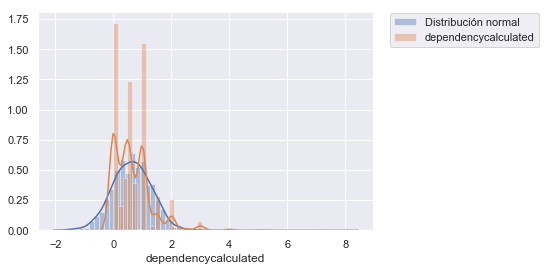

In [23]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(_ds_jef[_ds_jef['hogar_adul'] > 0]['dependencycalculated'], label='dependencycalculated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Con esto dejamos por sentado que definitivamente NO se corresponde con una normal, presenta demasiados picos en su distribución.

##### 5. ¿Cómo es la distribución condicionada a otra variable?

##### Target

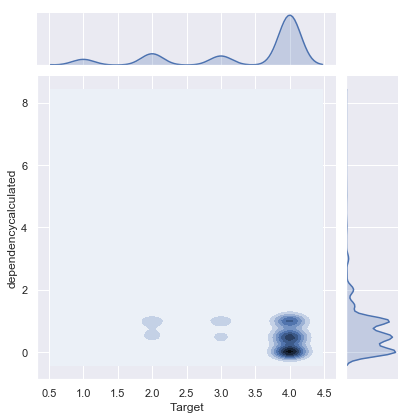

In [24]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef[_ds_jef['hogar_adul'] > 0],
                  x='Target', 
                  y='dependencycalculated', 
                  kind='kde')

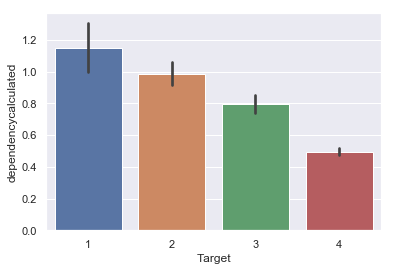

In [25]:
seaborn.barplot(data=_ds_jef[_ds_jef['hogar_adul'] > 0], x='Target', y='dependencycalculated')

Recién quitando los infinito de dependencia podemos observar el Target 4. Esto es porque el promedio baja considerablemente quitando los valores más altos, sin embargo de este modo es más representativo.
Podemos concluir que a medida que el Target mejora (aumenta) la dependencia disminuye considerablemente, lo cual podría ser lógico desde el negocio en pensar que las personas dependientes no tienen ingresos, solo generan gastos, por lo que se espera que sean más pobres.
Recordemos que la variable dependencia no indica cantidad sino razón, es decir que un valor alto no necesariamente implica muchos niños/ancianos sino es la comparación contra la cantidad de adultos.

##### Tamhog

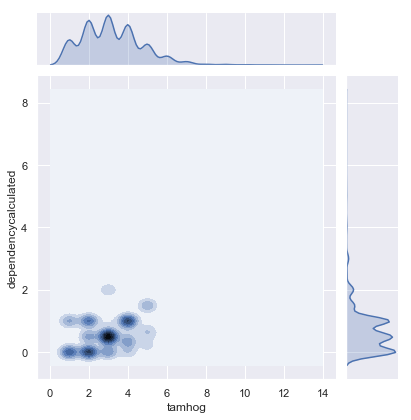

In [26]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef[_ds_jef['hogar_adul'] > 0],
                  x='tamhog', 
                  y='dependencycalculated', 
                  kind='kde')

Al ser el eje de las x una variable continua ya no se observa tanta claridad como en el gráfico anterior. Si podríamos divisar que existe cierta tendencia a que a mayor dependencia mayor tamaño del hogar, aunque no es tan clara, existen algunos valores que se salen de esta regla.

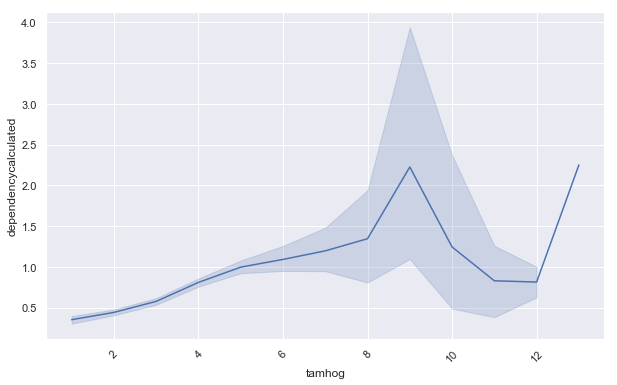

In [27]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=_ds_jef[_ds_jef['hogar_adul'] > 0],
                  x='tamhog', y='dependencycalculated')
plt.xticks(rotation=45);

Ahora la tendencia descripta anteriormente ya no es tan marcada, aunque tiene una tendencia a la suba.

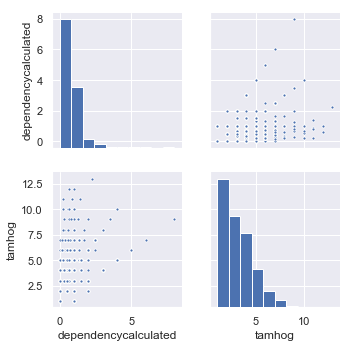

In [28]:
features = ['dependencycalculated','tamhog']
g = sns.pairplot(_ds_jef[_ds_jef['hogar_adul'] > 0][features], markers= '.')

Podemos asumir que estas variables no tienen una relación directa.

#### Variable 2: Instlevel

##### 1. ¿Qué tipo de variable es?

En realidad es un conjunto de variables bandera indicando si cumple o no con tal categoría. Antes de hacer el análisis la convertiremos en una única variable categórica.

In [29]:
# Categorización de NivelEducacion

_episo_dummies = _ds.loc[:,'instlevel1':'instlevel9']
_episo_categ = _episo_dummies.dot(_episo_dummies.columns)

_ds['NivelEducacion'] = _episo_categ
_ds.drop(columns = _episo_dummies.columns, inplace = True)

In [30]:
# Obtenemos los estadísticos principales para esta nueva variable.
_ds['NivelEducacion'].describe()

count           9557
unique            10
top       instlevel3
freq            1985
Name: NivelEducacion, dtype: object

##### 2. ¿Existen outliers en las variables seleccionadas?

In [31]:
_dsNivelEducacion = _ds['NivelEducacion'].value_counts().sort_index()
_dsNivelEducacion = pd.DataFrame(_dsNivelEducacion)
_dsNivelEducacion = _dsNivelEducacion.rename(columns = {'NivelEducacion':'Cdad'})
_dsNivelEducacion.index.names = ['Nivel']
_dsNivelEducacion

,Cdad
Nivel,
,3
instlevel1,1287
instlevel2,1630
instlevel3,1985
instlevel4,1772
instlevel5,1077
instlevel6,171
instlevel7,149
instlevel8,1336


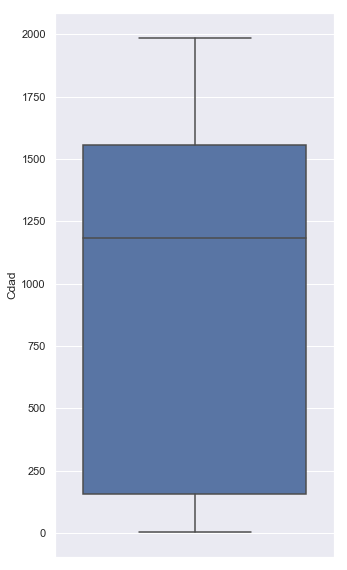

In [32]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_dsNivelEducacion, y='Cdad')

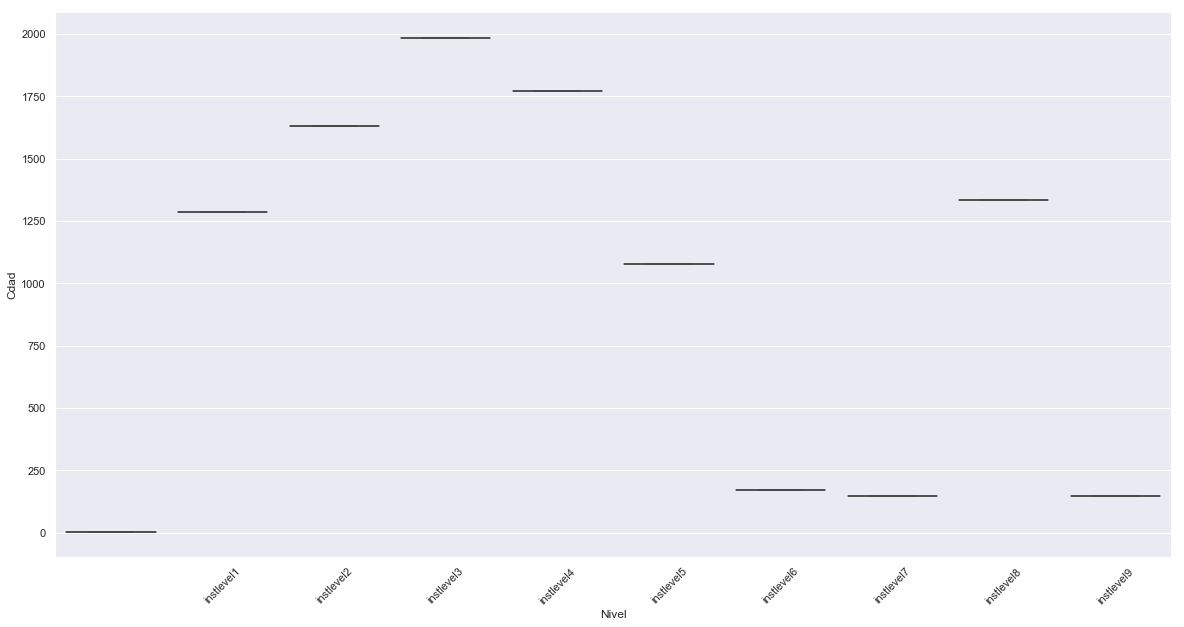

In [33]:
_dsNivelEducacion['Nivel'] = _dsNivelEducacion.index
plt.figure(figsize=(20,10))
seaborn.boxplot(data=_dsNivelEducacion, y='Cdad', x='Nivel')
plt.xticks(rotation=45)
seaborn.despine()

Resumen:

Como puede observarse no es interesante este gráfico para variables categóricas, menos aun desglozado por categoría donde no puede apreciarse nada por tener una escala de valores tam amplia. Si bien es una forma sencilla de observar cuantiles y la media sobre la distribución no existe el concepto de outliers ya que justamente no hay valores atípicos en categorías.

##### 3. ¿Hay valores faltantes? ¿Qué decisión tomarán al respecto en esta instancia de análisis? ¿Es mejor descartarlos o completarlos con un valor particular?

In [34]:
_ds['NivelEducacion'].unique()

array(['instlevel4', 'instlevel8', 'instlevel5', 'instlevel2',
       'instlevel1', 'instlevel7', 'instlevel3', 'instlevel9',
       'instlevel6', ''], dtype=object)

In [35]:
print('La cdad de Nan es:', _ds['NivelEducacion'].isnull().sum())
print('La cdad de vacío es:', _ds[_ds['NivelEducacion'] == ''].shape[0])

La cdad de Nan es: 0
La cdad de vacío es: 3


Como 3 valores en un total de 9557 es muy poca cantidad, estos registros podrían eliminarse. Dejaremos este accionar cuando realmente necesitemos usar esta columna. En cuanto a como completar los valores no sería posible reemplazarlos con IdHogar como en el caso anterior ya que este dato es propio de la persona entrevistada, no del hogar en si. No se lo puede considerar Nan como NO tiene educación ya que ya existe un valor para esta condición.

##### 4. ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?

No podría considerarse nunca una normal por ser una variable categórica.

##### 5. ¿Cómo es la distribución condicionada a otra variable?

Debemos convertir esta variable categórica en numérica para utilizar el gráfico de jointplot.

In [36]:
_dsprov = _ds
_dsprov['NivelEducacion'].replace(['instlevel1'], 1,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel2'], 2,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel3'], 3,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel4'], 4,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel5'], 5,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel6'], 6,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel7'], 7,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel8'], 8,inplace=True)
_dsprov['NivelEducacion'].replace(['instlevel9'], 9,inplace=True)
_dsprov['NivelEducacion'].replace([''], 0,inplace=True)
_dsprov['NivelEducacion'].unique()

array([4, 8, 5, 2, 1, 7, 3, 9, 6, 0], dtype=int64)

##### Target

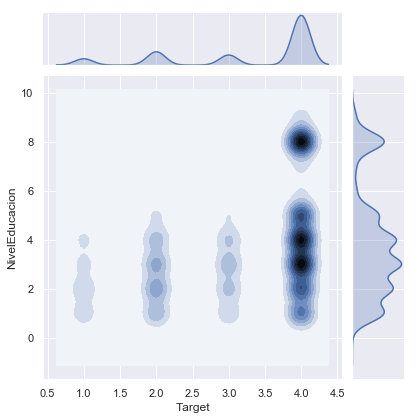

In [37]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='Target', 
                  y='NivelEducacion', 
                  kind='kde')

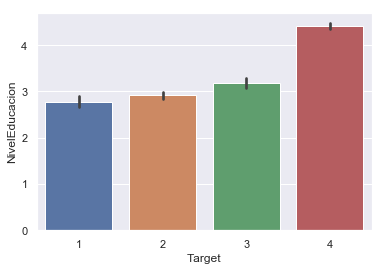

In [38]:
seaborn.barplot(data=_dsprov, x='Target', y='NivelEducacion')

En el primer gráfico podemos divisar las distribuciones por Target, donde observamos mayores niveles de educación a medida que el Target mejora. En cuanto la disminución en los níveles 6 y 7, ya lo corroboramos anteriormente cuando mostramos los count() por cada valor.
En el segundo gráfico no podemos obtener análisis alguno ya que NivelEducacion es categórica, un promedio no nos es relevante para esto. Debería descartarse.

##### Age

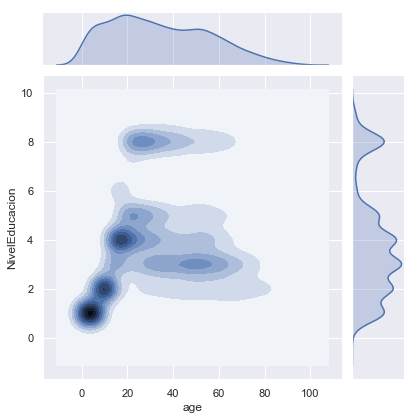

In [39]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='age', 
                  y='NivelEducacion', 
                  kind='kde')

Como era de esperarse la relación no podría ser decreciente en el comienzo, un niño no va a tener nunca un nivel universitario.
Respecto a las distribuciones podemos notar como la mayoria de los adultos se distribuyen entre educación 3 (primaria completa) y 5 (secundaria completa) predominantemente; además de los puntos más fuertes como son educación 1, 2 y 4 para las edades esperadas, es lógico un niño pequeño sin educación, tener 10 años con primaria imcompleta y secundaria incompleta a los 18 o 20 años respectivamente.

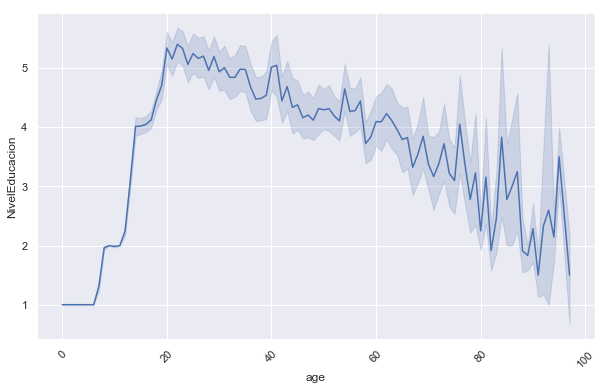

In [40]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=_dsprov,
                  x='age', y='NivelEducacion')
plt.xticks(rotation=45);

Visualmente no hay relación alguna entre la edad y la educación amén de las consideraciones lógicas indicadas previamente.

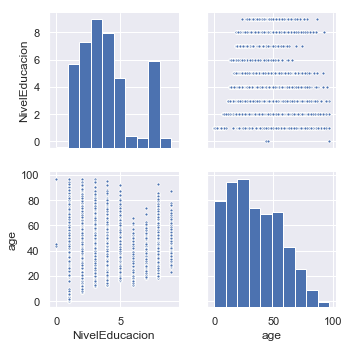

In [41]:
features = ['NivelEducacion','age']
g = sns.pairplot(_dsprov[features], markers= '.')

#### Variable 3: Overcrowding

Por ser una variable calificada como hogar, usaremos el dataset _ds_jef

##### 1. ¿Qué tipo de variable es?

In [42]:
_ds_jef['overcrowding'].value_counts().sort_index()

0.200000      1
0.250000     15
0.333333     61
0.400000      8
0.500000    209
0.600000      9
0.666667    199
0.750000     52
0.800000     12
0.833333      4
1.000000    838
1.166667      1
1.200000      6
1.250000     64
1.333333    299
1.400000      9
1.500000    353
1.600000      3
1.666667    163
1.750000     21
1.800000      1
1.833333      2
2.000000    370
2.200000      1
2.250000      3
2.333333     24
2.500000     81
2.666667      4
3.000000     99
3.333333      4
3.500000      6
3.666667      1
4.000000     25
4.333334      4
4.500000      1
5.000000     12
5.500000      2
6.000000      6
Name: overcrowding, dtype: int64

Esta variable es numérica (continua).

##### 2. ¿Existen outliers en las variables seleccionadas?

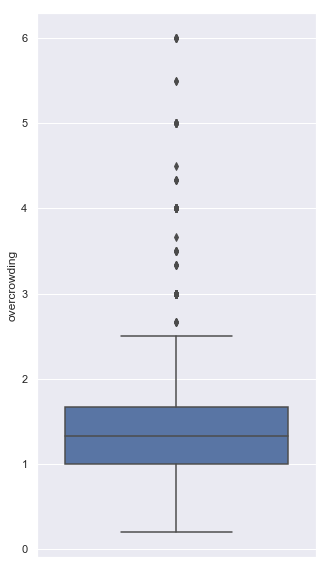

In [43]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='overcrowding')

Como puede observarse en el gráfico, los valores considerados típicos van de aprox 0,2 a 2,5. El tercer cuartil, es decir como máximo el 75% de los valores, se encuentran aprox hasta el valor 1,66. El primer cuartil, es decir como máximo el 25% de los valores, se encuentran en hasta el valor 1. Para el caso de la mediana se ve que ronda el 1,33. No hay valores atípicos negativos. Visualmente los outliers son relativamente pocos y el máximo llega a 6.

* Distancia a la media de 3 desviación standard:

In [44]:
print('Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos', sum(np.abs(ss.zscore(_ds_jef.overcrowding)>3)), 'outliers')

Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos 51 outliers


* 1.5 * IQR (rango intercuartil):

In [45]:
Q1 = _ds_jef.overcrowding.quantile(1/4)
Q3 = _ds_jef.overcrowding.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.overcrowding <= Q1 - 1.5*IQR) | (_ds_jef.overcrowding >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 164 outliers en Duración de interrupción


In [46]:
_ds_jef[is_outlier].sort_values(by=['overcrowding']).overcrowding.value_counts().sort_index()

2.666667     4
3.000000    99
3.333333     4
3.500000     6
3.666667     1
4.000000    25
4.333334     4
4.500000     1
5.000000    12
5.500000     2
6.000000     6
Name: overcrowding, dtype: int64

Visualmente no podemos saber estamos incluyendo o no los extremos por lo que lo analizaremos analiticamente, replicamos el código anterior pero cambiando los <= y >=por < y >

In [47]:
Q1 = _ds_jef.overcrowding.quantile(1/4)
Q3 = _ds_jef.overcrowding.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.overcrowding < Q1 - 1.5*IQR) | (_ds_jef.overcrowding > Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 164 outliers en Duración de interrupción


Resumen:

Mayor a 3 desviaciones: 51 outliers (1,71%).

1.5 * IQR: 164 outliers (5,51%), que van desde 2,66 a 6. Este método si se corresponde con el gráfico realizado.

9557 = 100%

##### 3. ¿Hay valores faltantes? ¿Qué decisión tomarán al respecto en esta instancia de análisis? ¿Es mejor descartarlos o completarlos con un valor particular?

In [48]:
print('La cdad de Nan es:', _ds_jef['overcrowding'].isnull().sum())
print('La cdad de vacío es:', _ds_jef[_ds_jef['overcrowding'] == ''].shape[0])

La cdad de Nan es: 0
La cdad de vacío es: 0


Un accionar podría haber sido ver qué valores tenían las demás entrevistas para el mismo IdHogar y, si eran diferentes de Nan, reemplazar.

##### 4. ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?

In [49]:
_ds_array = np.array(sorted(_ds_jef['overcrowding']))
_ds_array = np.asarray([ h for h in _ds_array if not np.isnan(h) ])
print('Resultado test ks para overcrowding: ' + str(stats.kstest(_ds_array, 'norm')))

Resultado test ks para overcrowding: KstestResult(statistic=0.6628718120980965, pvalue=0.0)


Al obtener el pValue = 0.0 no podemos validar la hipótesis nula H0, es decir no podemos afirmar que pertenece a una distribucion normal.

Usaremos un gráfico QQ para comparar la distribución contra a una distribución normal. Pero para ello, primero tenemos que identificar los parámetros de la función normal: la media y la desviación estándar muestral, o loc y scale según scipy.

In [50]:
loc, scale = stats.norm.fit(_ds_jef['overcrowding'])
loc, scale

(1.3756306809182643, 0.7455461897493415)

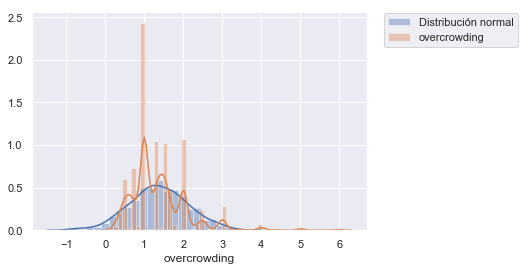

In [51]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(_ds_jef['overcrowding'], label='overcrowding')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Con esto dejamos por sentado que definitivamente NO se corresponde con una normal, presenta demasiados picos en su distribución.

##### 5. ¿Cómo es la distribución condicionada a otra variable?

##### Target

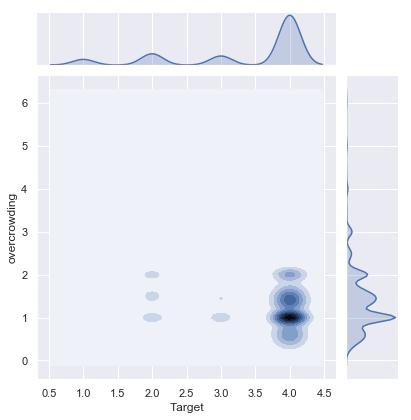

In [52]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef,
                  x='Target', 
                  y='overcrowding', 
                  kind='kde')

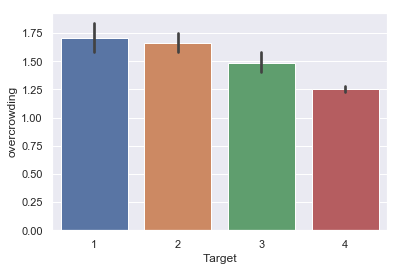

In [53]:
seaborn.barplot(data=_ds_jef, x='Target', y='overcrowding')

Podemos concluir que a medida que el Target mejora (aumenta) el overcrowding disminuye considerablemente, lo cual podría ser lógico desde el negocio en pensar que si hay muchas personas por habitación no es justamente por deseo sino que es el espacio disponible, por lo que se espera que sean más pobres.

##### Tamhog

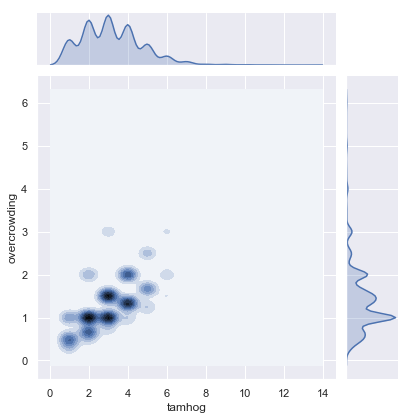

In [54]:
#plt.figure(figsize=(10,6))
#Comparamos contra Targer
seaborn.jointplot(data=_ds_jef,
                  x='tamhog', 
                  y='overcrowding', 
                  kind='kde')

Contrario a lo que se esperaba, el gráfico indica que a medida que aumenta el tamaño del hogar tiende a aumentar la cdad de personas por habitación.

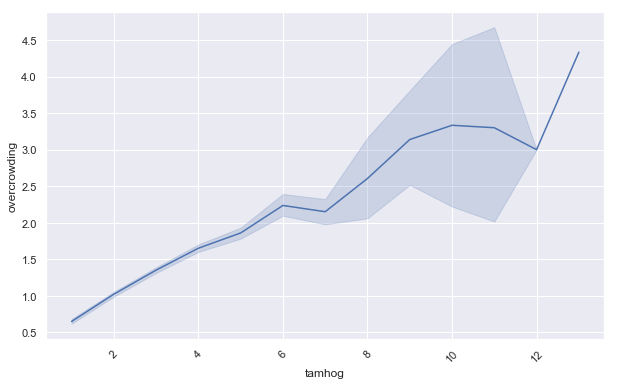

In [55]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=_ds_jef,
                  x='tamhog', y='overcrowding')
plt.xticks(rotation=45);

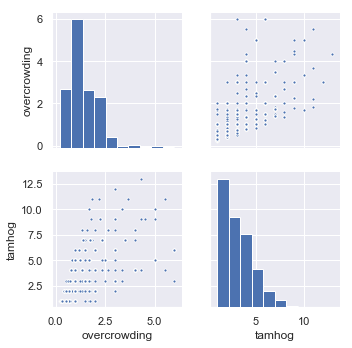

In [56]:
features = ['overcrowding','tamhog']
g = sns.pairplot(_ds_jef[features], markers= '.')

Efectivamenta tienden a crecer a la par ambas variables.

   #### Variable 4: TipoVivienda

Por ser una variable calificada como hogar, usaremos el dataset _ds_jef

##### 1. ¿Qué tipo de variable es?

In [57]:
_ds_jef['TipoVivienda'].value_counts().sort_index()

tipovivi1    1856
tipovivi2     280
tipovivi3     537
tipovivi4      46
tipovivi5     254
Name: TipoVivienda, dtype: int64

Es una variable categórica.

##### 2. ¿Existen outliers en las variables seleccionadas?

In [58]:
_dsTipoVivienda = _ds_jef['TipoVivienda'].value_counts().sort_index()
_dsTipoVivienda = pd.DataFrame(_dsTipoVivienda)
_dsTipoVivienda = _dsTipoVivienda.rename(columns = {'TipoVivienda':'Cdad'})
_dsTipoVivienda.index.names = ['TipoVivienda']
_dsTipoVivienda

,Cdad
TipoVivienda,
tipovivi1,1856
tipovivi2,280
tipovivi3,537
tipovivi4,46
tipovivi5,254


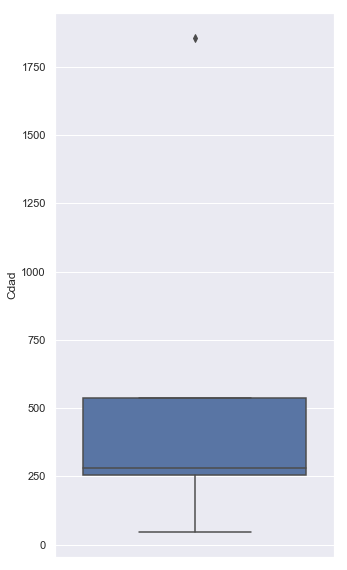

In [59]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_dsTipoVivienda, y='Cdad')

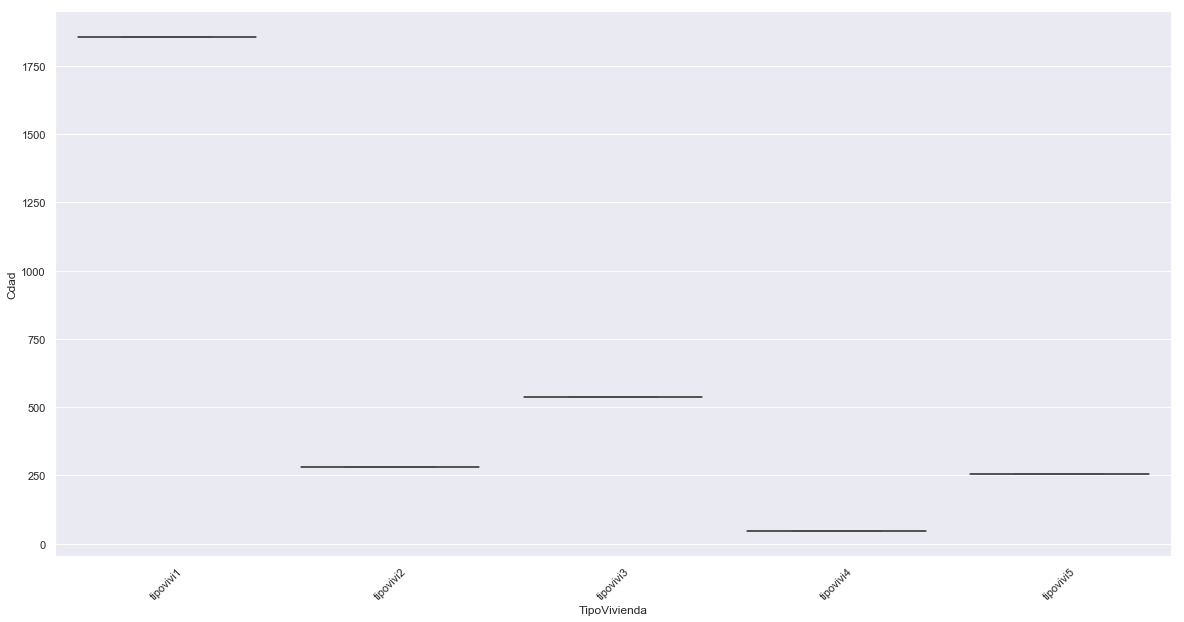

In [60]:
_dsTipoVivienda['TipoVivienda'] = _dsTipoVivienda.index
plt.figure(figsize=(20,10))
seaborn.boxplot(data=_dsTipoVivienda, y='Cdad', x='TipoVivienda')
plt.xticks(rotation=45)
seaborn.despine()

Resumen:

Sucede lo mismo que para el nivel de educación, sin embargo en el primer gráfico se puede observar al menos que hay una categoría que se la podría considerar outliers, por tener una frecuencia mayor a las demás, aunque en este caso más que un valor atípico sería un valor más típico por ser un valor mucho mayor (recordar que estamos graficando count(). Con esto reafirmamos que no es un análisis válido para categóricas.

##### 3. ¿Hay valores faltantes? ¿Qué decisión tomarán al respecto en esta instancia de análisis? ¿Es mejor descartarlos o completarlos con un valor particular?

In [61]:
print('La cdad de Nan es:', _ds_jef['TipoVivienda'].isnull().sum())
print('La cdad de vacío es:', _ds_jef[_ds_jef['TipoVivienda'] == ''].shape[0])

La cdad de Nan es: 0
La cdad de vacío es: 0


Un accionar podría haber sido ver qué valores tenían las demás entrevistas para el mismo IdHogar y, si eran diferentes de Nan, reemplazar.

##### 4. ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?

No podría considerarse nunca una normal por ser una variable categórica.

##### 5. ¿Cómo es la distribución condicionada a otra variable?

Debemos convertir esta variable categórica en numérica para utilizar el gráfico de jointplot.

In [62]:
_dsprov = _ds_jef
_dsprov['TipoVivienda'].replace(['tipovivi1'], 1,inplace=True)
_dsprov['TipoVivienda'].replace(['tipovivi2'], 2,inplace=True)
_dsprov['TipoVivienda'].replace(['tipovivi3'], 3,inplace=True)
_dsprov['TipoVivienda'].replace(['tipovivi4'], 4,inplace=True)
_dsprov['TipoVivienda'].replace(['tipovivi5'], 5,inplace=True)
_dsprov['TipoVivienda'].replace([''], 0,inplace=True)
_dsprov['TipoVivienda'].unique()

array([3, 1, 2, 5, 4], dtype=int64)

##### Target

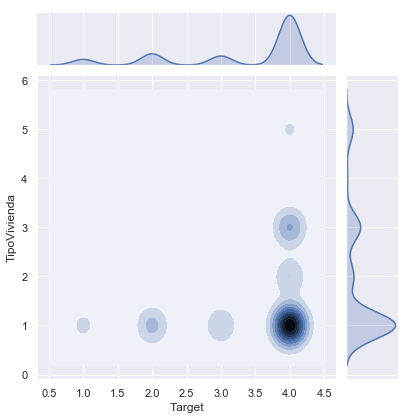

In [63]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='Target', 
                  y='TipoVivienda', 
                  kind='kde')

Como era de esperarse en Target 4 predominan las viviendas tipo 1 (casa propia y totalmente pagada), existen algunos casos para los Target menores, por lo que no es una relación tan evidente.

##### AbastecimientoAgua

In [64]:
_dsprov['AbastecimientoAgua'].replace(['abastaguadentro'], 1,inplace=True)
_dsprov['AbastecimientoAgua'].replace(['abastaguafuera'], 2,inplace=True)
_dsprov['AbastecimientoAgua'].replace(['abastaguano'], 3,inplace=True)
_dsprov['AbastecimientoAgua'].replace([''], 0,inplace=True)
_dsprov['AbastecimientoAgua'].unique()

array([1, 2, 3], dtype=int64)

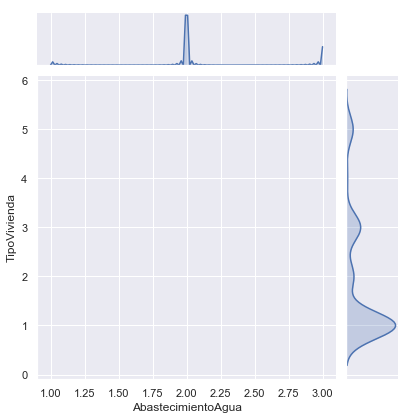

In [65]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='AbastecimientoAgua', 
                  y='TipoVivienda', 
                  kind='kde')

In [66]:
_dsAbastecimientoAgua = _dsprov['AbastecimientoAgua'].value_counts().sort_index()
_dsAbastecimientoAgua = pd.DataFrame(_dsAbastecimientoAgua)
_dsAbastecimientoAgua = _dsAbastecimientoAgua.rename(columns = {'_dsAbastecimientoAgua':'Cdad'})
_dsAbastecimientoAgua.index.names = ['_dsAbastecimientoAgua']
_dsAbastecimientoAgua

,AbastecimientoAgua
_dsAbastecimientoAgua,
1,2876
2,86
3,11


No es una relación interesante ya que la mayoría son abastaguadentro.

##### AbastecimientoElectricidad

In [67]:
_dsprov['AbastecimientoElectricidad'].replace(['public'], 1,inplace=True)
_dsprov['AbastecimientoElectricidad'].replace(['planpri'], 2,inplace=True)
_dsprov['AbastecimientoElectricidad'].replace(['noelec'], 3,inplace=True)
_dsprov['AbastecimientoElectricidad'].replace(['coopele'], 4,inplace=True)
_dsprov['AbastecimientoElectricidad'].replace([''], 0,inplace=True)
_dsprov['AbastecimientoElectricidad'].fillna(0, inplace=True)
_dsprov['AbastecimientoElectricidad'].unique()

array([1., 3., 0., 4., 2.])

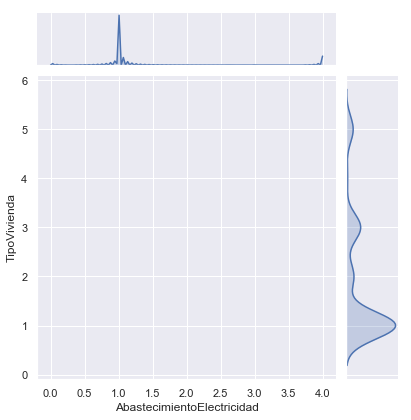

In [68]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='AbastecimientoElectricidad', 
                  y='TipoVivienda', 
                  kind='kde')

In [69]:
_dsAbastecimientoElectricidad = _dsprov['AbastecimientoElectricidad'].value_counts().sort_index()
_dsAbastecimientoElectricidad = pd.DataFrame(_dsAbastecimientoElectricidad)
_dsAbastecimientoElectricidad = _dsAbastecimientoElectricidad.rename(columns = {'_dsAbastecimientoElectricidad':'Cdad'})
_dsAbastecimientoElectricidad.index.names = ['_dsAbastecimientoElectricidad']
_dsAbastecimientoElectricidad

,AbastecimientoElectricidad
_dsAbastecimientoElectricidad,
0.0,4
1.0,2635
2.0,2
3.0,9
4.0,323


No es una relación interesante ya que la mayoría son public.

##### TipoSanitario

In [70]:
_dsprov['TipoSanitario'].replace(['sanitario1'], 1,inplace=True)
_dsprov['TipoSanitario'].replace(['sanitario2'], 2,inplace=True)
_dsprov['TipoSanitario'].replace(['sanitario3'], 3,inplace=True)
_dsprov['TipoSanitario'].replace(['sanitario4'], 4,inplace=True)
_dsprov['TipoSanitario'].replace(['sanitario5'], 5,inplace=True)
_dsprov['TipoSanitario'].replace(['sanitario6'], 6,inplace=True)
_dsprov['TipoSanitario'].replace([''], 0,inplace=True)
_dsprov['TipoSanitario'].fillna(0, inplace=True)
_dsprov['TipoSanitario'].unique()

array([2, 1, 3, 6, 5], dtype=int64)

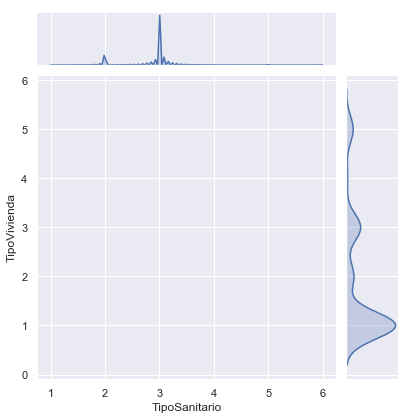

In [71]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='TipoSanitario', 
                  y='TipoVivienda', 
                  kind='kde')

In [72]:
_dsTipoSanitario = _dsprov['TipoSanitario'].value_counts().sort_index()
_dsTipoSanitario = pd.DataFrame(_dsTipoSanitario)
_dsTipoSanitario = _dsTipoSanitario.rename(columns = {'_dsTipoSanitario':'Cdad'})
_dsTipoSanitario.index.names = ['_dsTipoSanitario']
_dsTipoSanitario

,TipoSanitario
_dsTipoSanitario,
1,15
2,669
3,2243
5,39
6,7


No es una relación interesante ya que la mayoría son toilet connected to  septic tank.

##### EnergiaCocina

In [73]:
_dsprov['EnergiaCocina'].replace(['energcocinar1'], 1,inplace=True)
_dsprov['EnergiaCocina'].replace(['energcocinar2'], 2,inplace=True)
_dsprov['EnergiaCocina'].replace(['energcocinar3'], 3,inplace=True)
_dsprov['EnergiaCocina'].replace(['energcocinar4'], 4,inplace=True)
_dsprov['EnergiaCocina'].replace([''], 0,inplace=True)
_dsprov['EnergiaCocina'].fillna(0, inplace=True)
_dsprov['EnergiaCocina'].unique()

array([3, 2, 4, 1], dtype=int64)

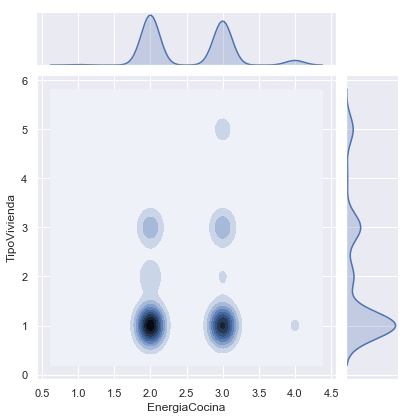

In [74]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_dsprov,
                  x='EnergiaCocina', 
                  y='TipoVivienda', 
                  kind='kde')

In [75]:
_dsEnergiaCocina = _dsprov['EnergiaCocina'].value_counts().sort_index()
_dsEnergiaCocina = pd.DataFrame(_dsEnergiaCocina)
_dsEnergiaCocina = _dsEnergiaCocina.rename(columns = {'_dsEnergiaCocina':'Cdad'})
_dsEnergiaCocina.index.names = ['_dsEnergiaCocina']
_dsEnergiaCocina

,EnergiaCocina
_dsEnergiaCocina,
1,15
2,1500
3,1320
4,138


Las distribuciones más marcadas indican que las viviendas tipo 1 tienenpredominantemente cocinas con gas o electricidad, aunque también las tipo 3.

#### Variable 5: V2a1

Por ser una variable calificada como hogar, usaremos el dataset _ds_jef

##### 1. ¿Qué tipo de variable es?

In [76]:
_ds_jef['v2a1'].value_counts().sort_index()

0.0           6
12000.0       1
13000.0       2
14000.0       1
15000.0       2
16000.0       1
17000.0       1
20000.0       7
23000.0       1
25000.0       7
25310.0       1
26000.0       1
27000.0       4
28000.0       1
30000.0      15
32000.0       2
32600.0       1
35000.0       7
36350.0       1
40000.0      25
42500.0       1
44000.0       1
45000.0       9
46500.0       1
50000.0      36
51000.0       1
52000.0       1
52831.0       1
55000.0       5
60000.0      21
62539.0       1
65000.0       6
68000.0       1
70000.0      26
72000.0       2
72554.0       1
73000.0       1
75000.0       6
77000.0       1
78000.0       1
78039.0       1
80000.0      28
83333.0       1
84529.0       2
85000.0       5
89000.0       2
90000.0      21
92000.0       1
93000.0       1
94000.0       1
95000.0       2
96000.0       1
97000.0       1
100000.0     54
100297.0      1
102000.0      1
104000.0      1
105000.0      1
105661.0      1
106000.0      1
107000.0      1
108000.0      1
110000.0

Esta variable es numérica (continua).

##### 2. ¿Existen outliers en las variables seleccionadas?

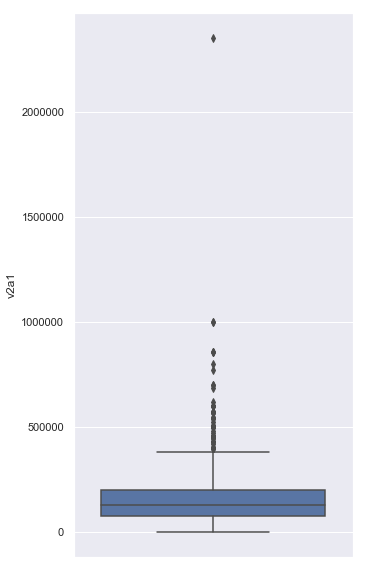

In [77]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='v2a1')

Como puede observarse en el gráfico, los valores considerados típicos van de aprox 0 a 375000. El tercer cuartil, es decir como máximo el 75% de los valores, se encuentran hasta el valor 230000 aprox. El primer cuartil, es decir como máximo el 25% de los valores, se encuentran en aprox hasta el valor 100000. Para el caso de la mediana se ve que ronda el 125000. No hay valores atípicos negativos, lo cual es lógico considerando que la variable representa el precio de la renta. Visualmente los outliers son bastantes y llegan a 1000000 e incluso un valor ronda los 2500000

* Distancia a la media de 3 desviación standard:

In [78]:
print('Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos', sum(np.abs(ss.zscore(_ds_jef.v2a1)>3)), 'outliers')

Bajo el criterio de distancia mayor a 3 desviaciones estándar encontramos 0 outliers


* 1.5 * IQR (rango intercuartil):

In [79]:
Q1 = _ds_jef.v2a1.quantile(1/4)
Q3 = _ds_jef.v2a1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.v2a1 <= Q1 - 1.5*IQR) | (_ds_jef.v2a1 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 63 outliers en Duración de interrupción


In [80]:
_ds_jef[is_outlier].sort_values(by=['v2a1']).v2a1.value_counts().sort_index()

399378.0     4
400000.0     8
420000.0     1
427905.0     2
432000.0     1
450000.0     3
456432.0     5
470000.0     1
480000.0     1
500000.0     7
510000.0     1
525000.0     1
540000.0     1
542013.0     1
550000.0     1
564834.0     1
570540.0     7
600000.0     5
620000.0     1
684648.0     1
700000.0     2
770229.0     1
800000.0     1
855810.0     3
1000000.0    2
2353477.0    1
Name: v2a1, dtype: int64

Probaremos de todos excluir los extremos, es decir, replicamos el código anterior pero cambiando los <= y >=por < y >

In [81]:
Q1 = _ds_jef.v2a1.quantile(1/4)
Q3 = _ds_jef.v2a1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.v2a1 < Q1 - 1.5*IQR) | (_ds_jef.v2a1 > Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers en Duración de interrupción')

Bajo el criterio de 1.5 * IQR encontramos 63 outliers en Duración de interrupción


Resumen:

Mayor a 3 desviaciones: 0 outliers (0%), en el gráfico puede observarse que existen outliers por lo que podemos asumir que este método está siendo muy permisivo considerando valores atípicos como típicos.

1.5 * IQR: 63 outliers (2,11%), que van desde 399378 a 2353477. Este método si se corresponde con el gráfico realizado.

9557 = 100%

##### 3. ¿Hay valores faltantes? ¿Qué decisión tomarán al respecto en esta instancia de análisis? ¿Es mejor descartarlos o completarlos con un valor particular?

In [82]:
print('La cdad de Nan es:', _ds_jef['v2a1'].isnull().sum())
print('La cdad de vacío es:', _ds_jef[_ds_jef['v2a1'] == ''].shape[0])

La cdad de Nan es: 2156
La cdad de vacío es: 0


##### 4. ¿Cómo es la distribución de las variables en el dataset? ¿Se distribuyen de manera normal? ¿Qué implicancias tiene esto?

In [83]:
_ds_array = np.array(sorted(_ds_jef['v2a1']))
_ds_array = np.asarray([ h for h in _ds_array if not np.isnan(h) ])
print('Resultado test ks para v2a1: ' + str(stats.kstest(_ds_array, 'norm')))

Resultado test ks para v2a1: KstestResult(statistic=0.99265605875153, pvalue=0.0)


Al obtener el pValue = 0.0 no podemos validar la hipótesis nula H0, es decir no podemos afirmar que pertenece a una distribucion normal.

Usaremos un gráfico QQ para comparar la distribución contra a una distribución normal. Pero para ello, primero tenemos que identificar los parámetros de la función normal: la media y la desviación estándar muestral, o loc y scale según scipy.

In [84]:
loc, scale = stats.norm.fit(_ds_jef['v2a1'])
loc, scale

(nan, nan)

Tendremos que quitar los valores Nan para poder obtener los parámetros, trabajaremos entonces sin esos registros, aunque no será representativo ya que los Nan representan el 72,51%.

In [85]:
loc, scale = stats.norm.fit(_ds_jef[_ds['v2a1'].isnull() == False]['v2a1'])
loc, scale

(168809.17503059976, 159948.05233318688)

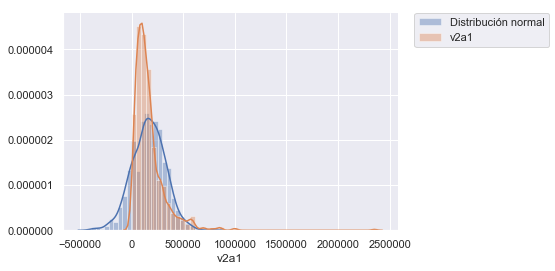

In [86]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(_ds_jef[_ds_jef['v2a1'].isnull() == False]['v2a1'], label='v2a1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Con esto dejamos por sentado que NO se corresponde con una normal, pero a grandes rasgos se parece más que en los demás casos teniendo un único pico sobresaliente, aunque así mismo está lejos de ser una gráfica simétrica.

Revisemos cómo hubiese sido la distribución si reemplazamos los Nan por 0.

In [87]:
_ds_jef_prov = _ds_jef
_ds_jef_prov['v2a1'].fillna(0, inplace=True)

In [88]:
_ds_array = np.array(sorted(_ds_jef_prov['v2a1']))
_ds_array = np.asarray([ h for h in _ds_array if not np.isnan(h) ])
print('Resultado test ks para v2a1: ' + str(stats.kstest(_ds_array, 'norm')))

Resultado test ks para v2a1: KstestResult(statistic=0.5, pvalue=0.0)


Al obtener el pValue = 0.0 no podemos validar la hipótesis nula H0, es decir no podemos afirmar que pertenece a una distribucion normal.

Usaremos un gráfico QQ para comparar la distribución contra a una distribución normal. Pero para ello, primero tenemos que identificar los parámetros de la función normal: la media y la desviación estándar muestral, o loc y scale según scipy.

In [89]:
loc, scale = stats.norm.fit(_ds_jef_prov['v2a1'])
loc, scale

(46389.874201143626, 112736.40627373199)

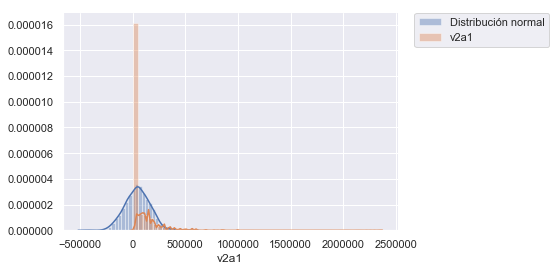

In [90]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(_ds_jef_prov['v2a1'], label='v2a1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Con esto dejamos por sentado que NO se corresponde con una normal, incluso no tiene siquiera un parecido en comparación con la versión anterior.

##### 5. ¿Cómo es la distribución condicionada a otra variable?

##### Target

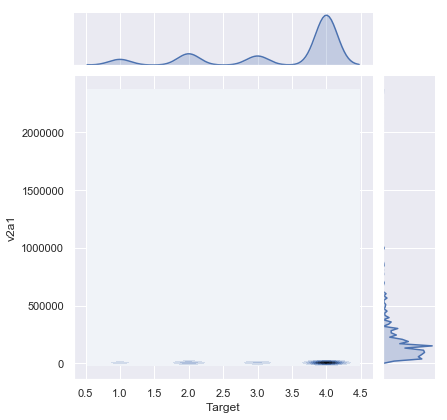

In [91]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef_prov,
                  x='Target', 
                  y='v2a1', 
                  kind='kde')

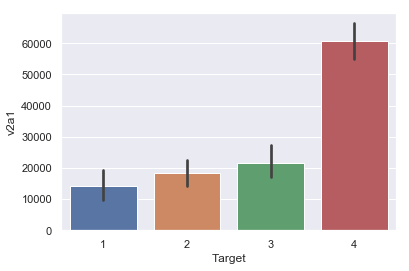

In [92]:
seaborn.barplot(data=_ds_jef_prov, x='Target', y='v2a1')

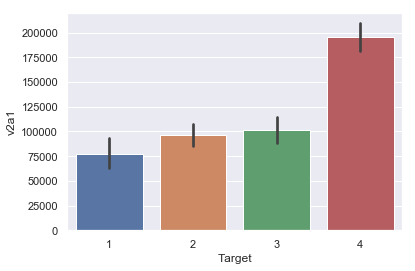

In [93]:
seaborn.barplot(data=_ds_jef_prov[_ds_jef_prov['v2a1'] > 0], x='Target', y='v2a1')

Tanto incluyendo los hogares que no alquilan ['v2a1'] = 0 como no incluyéndolos se observa una distribución similar, amén del cambio de escala. Cuan mayor es el precio del alquiler mayor es el Target.

##### Tamhog

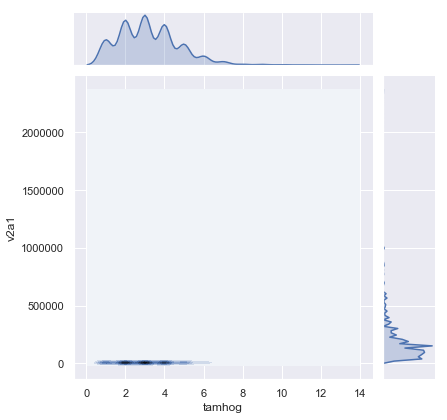

In [94]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef_prov,
                  x='tamhog', 
                  y='v2a1', 
                  kind='kde')

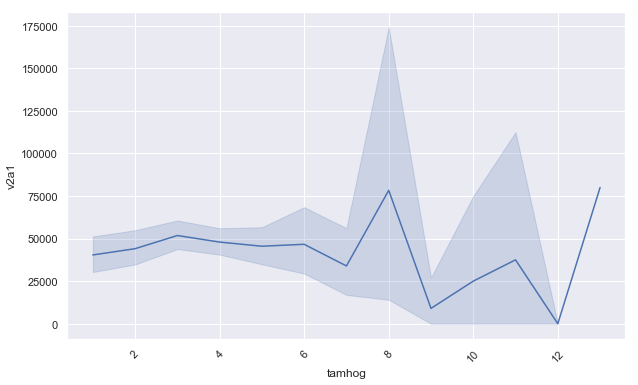

In [95]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=_ds_jef_prov,
                  x='tamhog', y='v2a1')
plt.xticks(rotation=45);

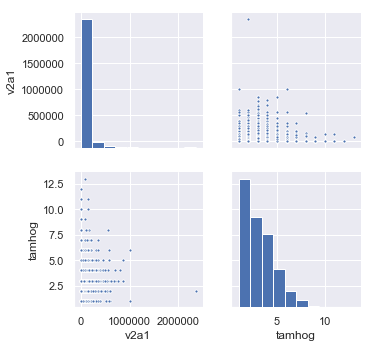

In [96]:
features = ['v2a1','tamhog']
g = sns.pairplot(_ds_jef[features], markers= '.')

No hay una tendencia marcada entre ambas variables

### 3. Preguntas Disparadoras
A continuación se presenta una serie de ***preguntas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos. Algunas de ellas deberán responderlas de manera obligatoria. 

#### 3.1 De Respuesta Obligatoria

###### 3.1.1 Como se distribuye el alquiler mensual del dataset? Y si observamos la distribución para cada clase?

count       2973.00
mean       46389.87
std       112755.37
min            0.00
25%            0.00
50%            0.00
75%        40000.00
max      2353477.00
Name: v2a1, dtype: float64

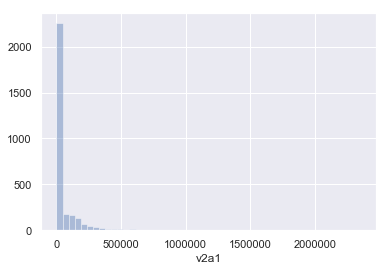

In [97]:
sns.distplot(_ds_jef['v2a1'].dropna(),
            kde=False)
_ds_jef['v2a1'].describe().round(2)

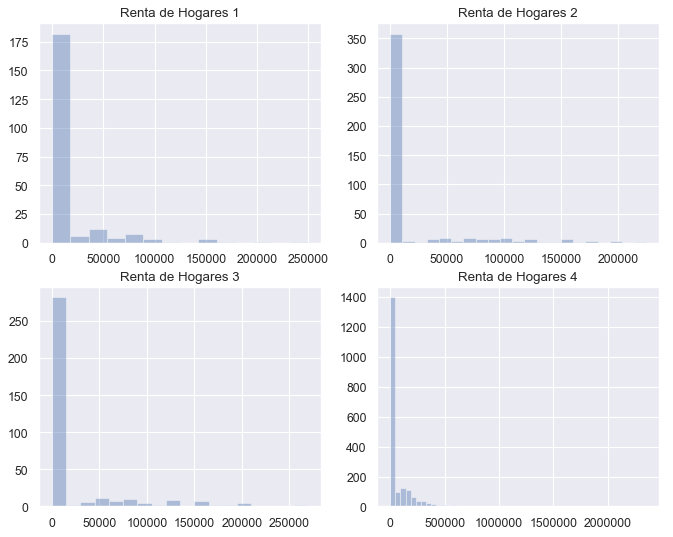

In [98]:
# Analizamos la distribución de la edad de los individuos
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)

def plot_dist(tipo):
    subplot(2,2,tipo)
    title('Renta de Hogares {}'.format(tipo))
    ax = sns.distplot(_ds_jef[(_ds_jef['Target'] == tipo)]['v2a1'].dropna()
                      ,kde=False)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
plot_dist(1)
plot_dist(2)
plot_dist(3)
plot_dist(4)

Para entender como se distribuyen las rentas del dataset primero nos quedamos únicamente con los jefes/as de hogar, ya que, si bien todos los integrantes del hogar deberían tener el mismo valor de la renta, la cantidad de personas que compone un hogar influiría en los resultados finales.
A modo general, el monto de la renta mensual esta centrado en torno a los 168.000 u.m.. Tambíen observamos que hay una gran cantidad de hogares que no pagan renta (esto podría deberse al tipo de vivienda, puede no ser locatario) y algunos pocos con alquileres muy altos, que podrían considerarse outliers.
A su vez, si los analizamos por nivel de pobreza podemos notar la gran cantidad de hogares tipo 4 que llevan la media de renta mensual al valor obtenido. La mayor parte de los hogares que pagan renta muy cercana a 0 son clase tipo 3 y 4.
Y como era de esperarse, salvo los tipo 3(muchos no pagan), a medida que la clasificación de pobreza es más baja, la renta media de las clase va reduciendose.

###### 3.1.2 Cuántos individuos que viven en hogares de extrema pobreza pagan un alquiler mensual mayor a 165.000 u.m.? Y más de 500.000?

In [99]:
def aux_fun(rent):
    return _ds_jef[(_ds_jef['Target'] == 1) & (_ds_jef['v2a1'] > rent )].shape[0]

print('Individuos con pobreza extrema y renta mayor a 165.000 um: {}'.format(aux_fun(165000)))
print('Individuos con pobreza extrema y renta mayor a 500.000 um: {}'.format(aux_fun(500000)))

Individuos con pobreza extrema y renta mayor a 165.000 um: 3
Individuos con pobreza extrema y renta mayor a 500.000 um: 0


###### 3.1.3 Cómo se correlacionan el tamaño del hogar o la vivienda con el alquiler mensual?

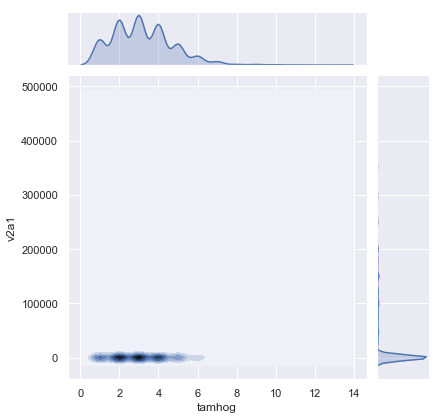

In [100]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef[(_ds_jef['parentesco1'] == 1) & (_ds_jef['v2a1']< 500000)],
                  x='tamhog', 
                  y='v2a1', 
                  kind='kde')

Podemos ver que la mayoría de los hogares tienen un tamaño de 3 y están pagando entre 70.000 u.m. y 110.000 u.m. aproximadamente. 
Este gráfico tuvo encuenta únicamente rentas menores a 500.000 u.m. para que pueda notarse con mayor nitidez la relación, de otra manera los considerados outliers terminan dificultando la interpretación.

###### 3.1.4 Cómo se relacionan el alquiler mensual con las clases? Explorar las métricas o estadísticos dentro de cada clase y compararlas.

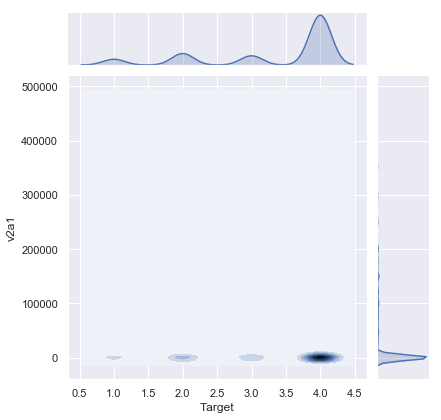

In [101]:
#plt.figure(figsize=(10,6))
seaborn.jointplot(data=_ds_jef[ (_ds_jef['v2a1']< 500000)],
                  x='Target', 
                  y='v2a1', 
                  kind='kde')

Se puede observar la gran cantidad de hogares tipo 4 con una renta entre 100.000 u.m y 150.000 u.m. Además podemos apreciar que hay muchos hogares tipo 2 que tienen una renta superior a hogares tipo 3.
Este gráfico tuvo encuenta únicamente rentas menores a 500.000 u.m. para que pueda notarse con mayor nitidez la relación, de otra manera los considerados outliers terminan dificultando la interpretación.

In [102]:
def target_static(target):
    return _ds_jef[(_ds_jef['Target'] == target)]['v2a1'].describe().round(2).reset_index(name='Hogar tipo {}'.format(target))

df_statics = [target_static(1),
             target_static(2),
             target_static(3),
             target_static(4)]
df_statics = [df.set_index('index') for df in df_statics]

df_statics[0].join(df_statics[1:])

,Hogar tipo 1,Hogar tipo 2,Hogar tipo 3,Hogar tipo 4
index,,,,
count,222.00,442.00,355.00,1954.00
mean,14260.03,18343.18,21604.68,60887.42
std,37145.11,43982.82,50234.24,132964.85
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,80000.00
max,249896.00,225000.00,270000.00,2353477.00


Observando los estadísticos de cada tipo de vivienda podemos notar que la cantidad de hogares tipo 4 es muy superior a las demás. Si bien su renta media es superior a los demás, la desviación que se observa en esta clase es tres veces supeior a las otras, algo que, luego de haber observado su gráfico de distribución, nos dice que los outliers terminan influyendo en ese incremento.
Otros aspectos a resaltar son que los hogares tipo 3 no poseen rentas en 0 y que la renta máxima del hogar tipo 1 es superior a los hogares tipo 2.

###### 3.1.5 Cómo se distribuyen los hogares por región y zona?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

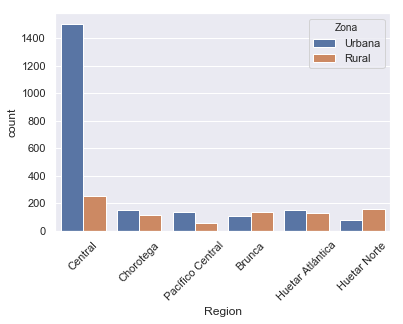

In [103]:
seaborn.countplot(data=_ds_jef, x='Region',hue='Zona')
plt.xticks(rotation=45)

Cláramente la Región Central es la que más hogares ṕosee en su zona Urbana. El resto de las regiones tiene una cantidad mucho menor de hogares y con una distribución más uniforme respecto a la primera. 
Pacifico Central tiene más del doble de hogares en su zona Urbana y lo contrario pasa en Huetar Norte.
Cabe aclarar que, si bien la cantidad de hogares es un indicador del tamaño de la población, este último estará directamente relacionado con la cantidad de personas que habite cada hogar. 

###### 3.1.6 Cuál es la región con menor y mayor alquiler mensual promedio? Hay mucha disparidad entre los alquileres de las distintas regiones?

In [104]:
mean_rent = _ds_jef[['Region', 'v2a1']].groupby(['Region']).mean().round(2).rename(columns={'v2a1':'Promedio'})
print('Región con menor promedio de renta mensual:\t{1}\t{0}\n\
Región con mayor promedio de renta mensual:\t{3}\t{2}'.format(min(mean_rent.index), 
                                                            min(mean_rent['Promedio']),
                                                            max(mean_rent.index),
                                                            max(mean_rent['Promedio'])))
display(mean_rent.sort_values('Promedio'))

Región con menor promedio de renta mensual:	14501.82	Brunca
Región con mayor promedio de renta mensual:	62184.41	Pacífico Central


,Promedio
Region,
Huetar Atlántica,14501.82
Brunca,17471.95
Huetar Norte,19997.83
Chorotega,32235.81
Pacífico Central,36234.99
Central,62184.41


###### 3.1.7 Cómo se distribuyen los alquileres dentro de cada zona (urbana/rural)? Son estadísticamente distintas las medias de los alquileres entre ambas zonas?

        Promedio
Zona            
Rural   21105.21
Urbana  56430.07


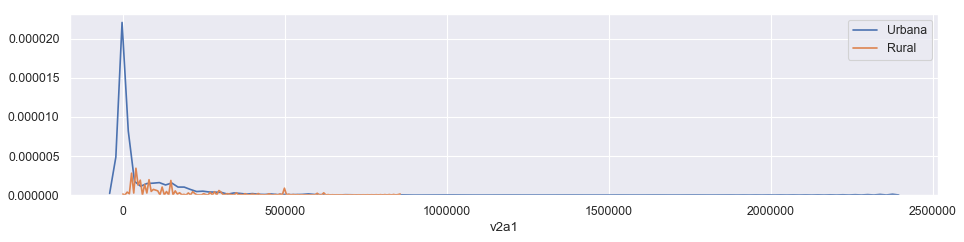

In [105]:
figure(num=None, figsize=(14, 3), dpi=80)
sns.distplot(_ds_jef[_ds_jef['Zona']=='Urbana']['v2a1'].dropna(),
             label='Urbana',
            hist=False)
sns.distplot(_ds_jef[_ds_jef['Zona']=='Rural']['v2a1'].dropna(),
            label='Rural',
            hist=False)

mean_rent = _ds_jef[['Zona', 'v2a1']].groupby(['Zona']).mean().round(2).rename(columns={'v2a1':'Promedio'})
print(mean_rent)

La zona urbana tiene una media de renta superior que la zona rural. Además posee una mayor dispersión en sus montos que la rural, en la que los valores de la renta se concentran en la media.

###### 3.1.8 Cuál es la probabilidad de que un hogar de máxima pobreza se encuentre en una zona rural?

In [106]:
_ds_jef.groupby('Target')['Zona'].value_counts()/_ds_jef.groupby('Target')['Zona'].count()

Target  Zona  
1       Urbana    0.644144
        Rural     0.355856
2       Urbana    0.662896
        Rural     0.337104
3       Urbana    0.647887
        Rural     0.352113
4       Urbana    0.748209
        Rural     0.251791
Name: Zona, dtype: float64

Dado que el hogar debe estar en una zona rural, posee un 35% de probabilidades que sea de máxima pobreza o tipo 1.

###### 3.1.9 Quiénes pagan más renta: los hogares con mujeres jefas de hogar o los hogares con hombres jefes de hogar?

In [107]:
_ds_jef['Genero'].value_counts()

male      1810
female    1163
Name: Genero, dtype: int64

In [108]:
rent_jefe = sum(_ds_jef[(_ds_jef['Genero'] == 'male')]['v2a1'])
rent_jefa = sum(_ds_jef[(_ds_jef['Genero'] == 'female')]['v2a1'])
print('Renta Jefe: {}\nRenta Jefa: {}'.format(rent_jefe,rent_jefa))

Renta Jefe: 85803114.0
Renta Jefa: 52113982.0


###### 3.1.10 Cómo se distribuyen las clases de hogares según el género de la persona jefa de hogar?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

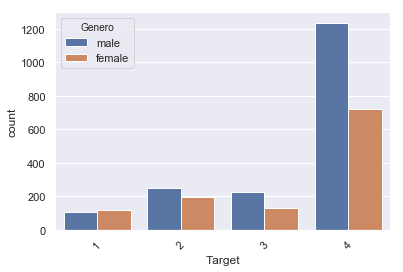

In [109]:
seaborn.countplot(data=_ds_jef, x='Target',hue='Genero')
plt.xticks(rotation=45)

En hogares tipo 2, 3 y 4, predomina la presencia de jefea de hogares sobre una jefas, dándose mayor notoriedad en los tipo 4. En hogares tipo 1 existe una leve superioridad de jefas de hogar.

Otro aspecto a resaltar es que a medida que la catalogación del hogar es superior, comienza a notarse una proporción mayor de jefes de hogares masculinos que femeninos.

###### 3.1.11 Cuántos de los hogares de extrema pobreza tienen mujeres como jefas de hogar?

In [110]:
cant = _ds_jef[(_ds_jef['Genero'] == 'female') & (_ds_jef['Target']==1)].shape[0]
print('Mujeres jefas de hogar en condiciones de extrema pobreza: {}'.format(cant))

Mujeres jefas de hogar en condiciones de extrema pobreza: 118


###### 3.1.12 Cuál es la probabilidad de que una mujer sea jefa de un hogar de extrema pobreza?

In [111]:
_ds_jef.groupby('Target')['Genero'].value_counts()/_ds_jef.groupby('Target')['Genero'].count()

Target  Genero
1       female    0.531532
        male      0.468468
2       male      0.558824
        female    0.441176
3       male      0.628169
        female    0.371831
4       male      0.632549
        female    0.367451
Name: Genero, dtype: float64

Dado que el hogar debe sea de extrema pobreza, existe un 53% de probabilidades que sea de genero femenino.

###### 3.1.13 Cuál es la probabilidad de que un hogar sea de extrema pobreza dado que la jefa de hogar es mujer?

In [112]:
_ds_jef.groupby('Genero')['Target'].value_counts()/_ds_jef.groupby('Genero')['Target'].count()

Genero  Target
female  4         0.617369
        2         0.167670
        3         0.113500
        1         0.101462
male    4         0.682873
        2         0.136464
        3         0.123204
        1         0.057459
Name: Target, dtype: float64

Dado que el hogar debe poseer un jefe de hogar de género femenino, existe un 10% de probabilidades que sea un hogar de máxima pobreza.

###### 3.1.14 Analizar las personas jefas de hogar por género y edad.

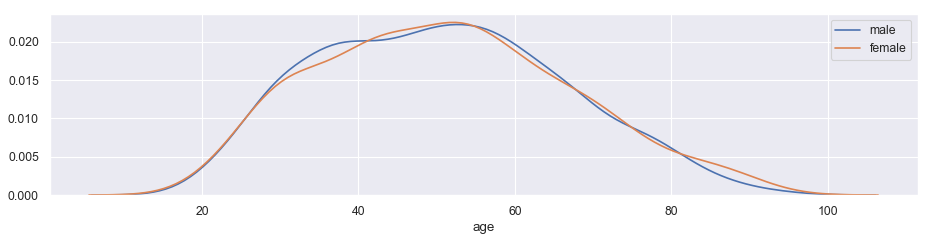

In [113]:
figure(num=None, figsize=(14, 3), dpi=80)
sns.distplot(_ds_jef[(_ds_jef['Genero'] == 'male')]['age'].dropna(),
             label='male',
             hist=False)
sns.distplot(_ds_jef[(_ds['Genero'] == 'female')]['age'].dropna(),
             label='female',
             hist=False)


Se observa los individuos masculinos comienzan siendo jefes de hogar a más temprana edad que los femeninos, esta tendencia se nota desde los 25 años y se extiende hasta los 40, a partir de la cual existe relativamente igual cantidad en ambos géneros.

In [31]:
_ds_jef[['rooms','tamviv','Target']].head(500).sort_values(['Target'])

,rooms,tamviv,Target
994,4,5,1
1405,5,3,1
1070,4,3,1
157,5,5,1
1400,4,4,1
1436,5,3,1
1088,6,1,1
1272,1,1,1
433,2,2,1
1450,6,5,1


In [37]:
P_data=_ds_jef

In [43]:
P_data['P_OverCrow']=P_data['tamviv']/P_data['bedrooms']

In [45]:
P_data[['Id','idhogar','rooms','tamviv','bedrooms','hacdor','P_OverCrow','overcrowding','Target']].head(500).sort_values(['Target'])

,Id,idhogar,rooms,tamviv,bedrooms,hacdor,P_OverCrow,overcrowding,Target
994,ID_ea8c0699c,34bab1f1f,4,5,3,0,1.666667,1.666667,1
1405,ID_e489c907d,f69a0fad6,5,3,3,0,1.000000,1.000000,1
1070,ID_75f7cca97,ca2b17170,4,3,2,0,1.500000,1.500000,1
157,ID_d1c8bde78,347058ce6,5,5,3,0,1.666667,1.666667,1
1400,ID_44521f331,b362177ec,4,4,2,0,2.000000,2.000000,1
1436,ID_9c63c4c0a,9a90cd4fb,5,3,3,0,1.000000,1.000000,1
1088,ID_7c33c1884,a0695cb68,6,1,3,0,0.333333,0.333333,1
1272,ID_7765d5db2,f1265ca75,1,1,1,0,1.000000,1.000000,1
433,ID_f0f523be5,b0bef5a48,2,2,1,0,2.000000,2.000000,1
1450,ID_5150c76a7,203a579b9,6,5,3,0,1.666667,1.666667,1
